In [1]:
import numpy as np
import pandas as pd
import pybrain

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize']= 16,5

In [3]:
from pybrain import FeedForwardNetwork
from pybrain import LinearLayer,SigmoidLayer
from pybrain import FullConnection
from pybrain.supervised.trainers import BackpropTrainer

importing FeedForward Network class from pybrain

In [2]:
from pybrain import FeedForwardNetwork
n = FeedForwardNetwork()

importing LinearLayer and SigmoidLayer as layer class of neurons for each layer

In [3]:
from pybrain import LinearLayer,SigmoidLayer
inLayer = LinearLayer(2)
hiddenLayer = SigmoidLayer(2)
outLayer = LinearLayer(1)

Adding layers to FFN

In [4]:
n.addInputModule(inLayer)
n.addModule(hiddenLayer)
n.addOutputModule(outLayer)

Import FullConnecition Class to create matrix for connections between layers

In [5]:
from pybrain import FullConnection
in_to_hidden = FullConnection(inLayer,hiddenLayer)
hidden_to_out = FullConnection(hiddenLayer,outLayer)

Add connections to FNN

In [6]:
n.addConnection(in_to_hidden)
n.addConnection(hidden_to_out)

Sort Modules in FNN for initialice the FNN as topologically sorted of the modules (layers)

In [7]:
n.sortModules()

Printing the FNN estructures 

In [8]:
print n

FeedForwardNetwork-6
   Modules:
    [<LinearLayer 'LinearLayer-3'>, <SigmoidLayer 'SigmoidLayer-7'>, <LinearLayer 'LinearLayer-8'>]
   Connections:
    [<FullConnection 'FullConnection-4': 'SigmoidLayer-7' -> 'LinearLayer-8'>, <FullConnection 'FullConnection-5': 'LinearLayer-3' -> 'SigmoidLayer-7'>]



activating the FFN

In [9]:
n.activate([1,2])

array([-1.38922383])

Checking connections weigths

In [10]:
in_to_hidden.params

array([ 0.78400177,  0.72852973, -0.27533457,  1.11515738])

In [11]:
hidden_to_out.params

array([-0.56228732, -1.00570414])

In [12]:
n.params

array([ 0.78400177,  0.72852973, -0.27533457,  1.11515738, -0.56228732,
       -1.00570414])

Creating DataSet

In [3]:
from pybrain.datasets import SupervisedDataSet

In [4]:
DS = SupervisedDataSet(3,2)
DS.appendLinked([1,2,3], [4,5] )
len(DS)

1

In [7]:
DS['input']

array([[ 1.,  2.,  3.]])

In [140]:
def create_DS(values, lags):
    dataSet = np.zeros((len(values)-(lags), lags))
    for x in xrange(len(values)-(lags)):
        dataSet[x] = values[x: x+lags]
    return dataSet

In [64]:
val = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
lag = 12
dat = create_DS(val,lag)
dat

array([[  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.],
       [  2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
         13.],
       [  3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,
         14.],
       [  4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,
         15.],
       [  5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,
         16.],
       [  6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,
         17.],
       [  7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,
         18.],
       [  8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,
         19.],
       [  9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,
         20.],
       [ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,
         21.],
       [ 11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.],
       [ 12.,  13.,  

In [4]:
rawData = pd.read_csv('resources/Consulta_Banxico.csv', sep=',', encoding='latin1', skiprows=16, skip_blank_lines=True)
column = rawData.columns.values

In [5]:
rawData
Data = rawData.drop(rawData.index[:2])
Data = Data.reset_index(drop = True)
Data.columns = ['Fecha' , 'Tasa de crecimiento Mensual']

Se eliminan los 2 primeros indices debido a que no son utiles ( es texto y la primera observación no tiene valor) y se crea la estructura de Serie (para la serie de tiempo)

In [6]:
TS = pd.Series(Data['Tasa de crecimiento Mensual'].astype(float))

In [7]:
TS.index= Data['Fecha']

In [75]:
plt.figure()
TS.plot(style='o-', label = 'Series')
plt.legend()

In [9]:
from pybrain import datasets

In [10]:
def create_DataMatrix_Output(values,TS, lags):
    dataSet = np.zeros((len(values)-(lags), lags))
    for x in xrange(len(values)-(lags)):
        dataSet[x] = values[x: x+lags]
    output = TS[lags:]    
    return dataSet,output

In [11]:
dataMatrix, output = create_DataMatrix_Output(Data['Tasa de crecimiento Mensual'],TS,12)
Train = dataMatrix[:383]
TrainOutput = output[:383]
Val = dataMatrix[383:395]
ValOutput = output[383:395]
Test = dataMatrix[395:]
TestOutput = output[395:]

In [12]:
def create_DS(dataMatrix,output,lags):
    DS = datasets.SupervisedDataSet(12, 1)
    for x in xrange(len(dataMatrix)):
        DS.appendLinked(dataMatrix[x], output[x])
    return DS

In [13]:
TrainDS = create_DS(Train,TrainOutput,12)
ValDS = create_DS(Val,ValOutput,12)
TestDS= create_DS(Test,TestOutput,12)

In [25]:
ffn = FeedForwardNetwork()
inLayer = LinearLayer(12)
hiddenLayer = SigmoidLayer(3)
outLayer = LinearLayer(1)

In [26]:
ffn.addInputModule(inLayer)
ffn.addModule(hiddenLayer)
ffn.addOutputModule(outLayer)

In [27]:
in_to_hidden = FullConnection(inLayer,hiddenLayer)
hidden_to_out = FullConnection(hiddenLayer,outLayer)
ffn.addConnection(in_to_hidden)
ffn.addConnection(hidden_to_out)

In [28]:
ffn.sortModules()

In [29]:
trainer = BackpropTrainer(ffn, TrainDS)

In [30]:
trainer.trainUntilConvergence(verbose= True, maxEpochs=1000, validationProportion= 0.1,continueEpochs= 10)

('train-errors:', '[57.0475  , 55.3116  , 55.8284  , 56.071   , 55.4055  , 55.6966  , 55.4213  , 55.4935  , 56.0845  , 55.5942  , 55.1429  , 55.4424  , 55.0236  , 53.989   , 55.4965  , 55.0022  , 54.8283  , 55.0403  , 54.7857  , 54.4541  , 54.5634  , 54.7562  , 54.7294  , 54.4517  , 54.5742  , 54.2518  , 54.5774  , 54.2585  , 54.2142  , 54.4173  , 55.1437  , 55.3344  , 55.1532  , 55.1611  , 54.9877  , 55.0573  , 55.0106  , 54.9031  , 54.8609  , 54.7713  , 54.9088  , 54.8128  , 54.7891  , 54.915   , 54.7653  , 54.7668  , 54.7557  , 55.2507  , 55.1782  , 55.3814  , 55.4021  , 54.6924  , 54.5608  , 54.1591  , 53.7958  , 54.795   , 54.2197  , 54.6288  , 54.6973  , 54.4736  , 54.5307  , 54.4823  , 54.4179  , 54.9358  , 54.6214  , 54.7015  , 54.3109  , 54.4467  , 53.9605  , 54.6387  , 54.5325  , 54.4417  , 54.5481  , 54.3774  , 54.5171  , 54.4611  , 54.5305  , 54.4887  , 54.6287  , 54.4837  , 54.2263  , 54.5657  , 54.5385  , 54.4995  , 54.5809  , 54.3678  , 54.5364  , 54.4324  , 54.5634  , 5

([57.047505866091349,
  55.311585763950937,
  55.828361602487874,
  56.070954349882463,
  55.405503040430929,
  55.696585150572986,
  55.421342310070678,
  55.493544650418876,
  56.084547092015526,
  55.594224311881185,
  55.142859585000295,
  55.442401291784513,
  55.023642598681022,
  53.988966305515874,
  55.49654372168979,
  55.002182371554092,
  54.828325366568286,
  55.040285607353297,
  54.785701669311408,
  54.454114004706319,
  54.563439212144317,
  54.756236876889623,
  54.729398506903316,
  54.451736140196864,
  54.57418647102336,
  54.251769527895007,
  54.577387450187615,
  54.2585222310422,
  54.214157004976514,
  54.417301534775113,
  55.143695738328695,
  55.334450189558588,
  55.153211141971425,
  55.161054750019247,
  54.987667917152763,
  55.057259203961515,
  55.010615436466679,
  54.903134753101178,
  54.860919900117622,
  54.771277246964885,
  54.908836282356262,
  54.812788713382233,
  54.789113797905671,
  54.914997836009967,
  54.76525691013854,
  54.7668491291

In [116]:
predictions = ffn.activateOnDataset(TestDS)
predictions = predictions.reshape(1,12)

In [122]:
TStestPredictions = pd.Series(predictions[0].astype(float), index = TS.index[len(TS)-12:])
TStestOutputs = pd.Series(TestOutput, index = TS.index[len(TS)-12:])

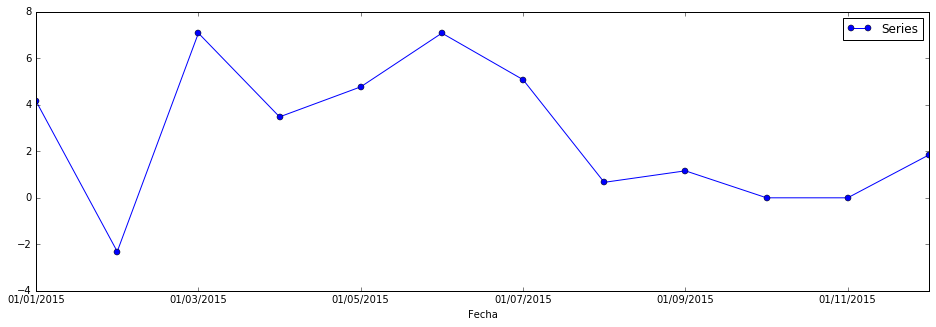

In [119]:
plt.figure()
TStestPredictions.plot(style='o-', label = 'Series')
plt.legend()

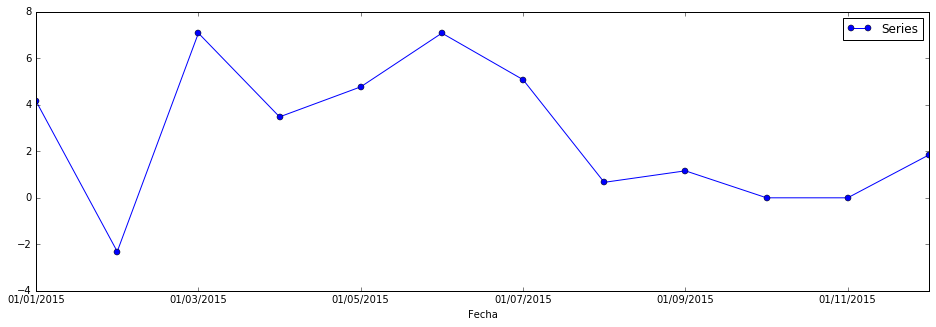

In [120]:
plt.figure()
TestOutput.plot(style='o-', label = 'Series')
plt.legend()

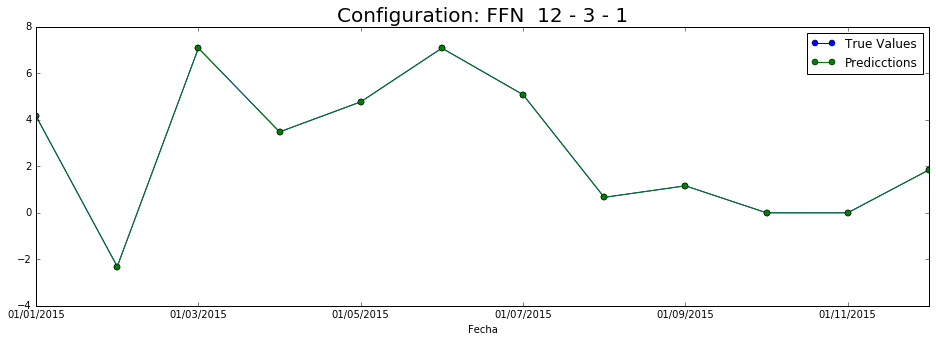

In [121]:
plt.figure()
TStestOutputs.plot(style= 'o-', label = "True Values")
TStestPredictions.plot(style = 'o-', label = "Predicctions")
plt.legend()
plt.title('Configuration: FFN  12 - 3 - 1', fontsize = 20)

In [108]:
TSpredictions = TS
TSpredictions[len(TS)-12:] = TStestPredictions

In [114]:
print TS[len(TS)-12:],TStestPredictions

Fecha
01/01/2015    4.154675
01/02/2015   -2.311349
01/03/2015    7.083323
01/04/2015    3.480600
01/05/2015    4.771974
01/06/2015    7.083323
01/07/2015    5.080926
01/08/2015    0.664878
01/09/2015    1.160139
01/10/2015   -0.000345
01/11/2015   -0.000633
01/12/2015    1.843960
Name: Tasa de crecimiento Mensual, dtype: float64 Fecha
01/01/2015    4.154675
01/02/2015   -2.311349
01/03/2015    7.083323
01/04/2015    3.480600
01/05/2015    4.771974
01/06/2015    7.083323
01/07/2015    5.080926
01/08/2015    0.664878
01/09/2015    1.160139
01/10/2015   -0.000345
01/11/2015   -0.000633
01/12/2015    1.843960
dtype: float64


In [110]:
plt.figure()
TS[100:].plot(style = 'o-', label = 'Original')
TSpredictions[100:].plot(style = 'o-', label = 'Predictions')
plt.legend();
plt.title('Original and predictions', fontsize = 20)